In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.stats as st
plt.style = "seaborn"

In [2]:
incident_file = r"input data\209-PLUS\ics209-plus-wildfire\ics209-plus-wildfire\ics209-plus-wf_incidents_1999to2014.csv"
incident_summary_df = pd.read_csv(incident_file)
incident_summary_df = incident_summary_df.drop("Unnamed: 0", axis=1)
incident_summary_df

C:\Users\srandrad\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,13,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,INCIDENT_ID,INCIDENT_NUMBER,INCIDENT_NAME,INCTYP_ABBREVIATION,FINAL_ACRES,CAUSE,COMPLEX,DISCOVERY_DATE,DISCOVERY_DOY,EXPECTED_CONTAINMENT_DATE,...,FOD_CAUSE_DESCR,FOD_FIRE_SIZE,FOD_COMPLEX_NAME,FOD_OBJ,FOD_LIST,FOD_ID,MTBS_ID,MTBS_FIRE_NAME,FOD_LATITUDE,FOD_LONGITUDE
0,1999_AK-AIC-B251_MINTO,AK-AIC-B251,MINTO,WF,3800.0,H,False,1999-06-14 00:00:00,165,1999-06-24 00:00:00,...,Debris Burning,3876.0,NaN,"[{""ID"" : 214512, ""MTBS_ID"" : ""AK65126149404199...","['{""ID"" : 214512, ""MTBS_ID"" : ""AK6512614940419...",214512.0,AK6512614940419990613,MINTO,65.149500,-149.369100
1,1999_AK-ARM-B222_DONNELLY FLATS,AK-ARM-B222,DONNELLY FLATS,WF,18000.0,H,False,1999-06-11 00:00:00,162,1999-06-21 00:00:00,...,Arson,18720.0,NaN,"[{""ID"" : 214500, ""MTBS_ID"" : ""AK63915145731199...","['{""ID"" : 214500, ""MTBS_ID"" : ""AK6391514573119...",214500.0,AK6391514573119990611,DONNELLY FLATS,63.816300,-145.669000
2,1999_AK-GAD-B447_ROUNDABOUT MOUNTAIN,AK-GAD-B447,ROUNDABOUT MOUNTAIN,WF,6600.0,L,False,1999-07-11 00:00:00,192,NaN,...,Lightning,5763.0,NaN,"[{""ID"" : 214588, ""MTBS_ID"" : ""AK65584156460199...","['{""ID"" : 214588, ""MTBS_ID"" : ""AK6558415646019...",214588.0,AK6558415646019990711,ROUNDABOUT MOUNTAIN,65.582700,-156.469200
3,1999_AK-STA-901106_HELMAUR (CLARK WOLVERINE),AK-STA-901106,HELMAUR (CLARK WOLVERINE),WF,221.0,H,False,1999-05-18 00:00:00,138,NaN,...,Debris Burning,227.0,NaN,"[{""ID"" : 403096, ""COORDS"" : (61.67199, -149.03...","['{""ID"" : 403096, ""COORDS"" : (61.67199, -149.0...",403096.0,NaN,NaN,61.671990,-149.034700
4,1999_AK-STA-901107_EKLUTNA,AK-STA-901107,EKLUTNA,WF,383.0,H,False,1999-05-18 00:00:00,138,1999-05-21 00:00:00,...,Debris Burning,383.0,NaN,"[{""ID"" : 214490, ""COORDS"" : (61.4328, -149.218...","['{""ID"" : 214490, ""COORDS"" : (61.4328, -149.21...",214490.0,NaN,NaN,61.432800,-149.218900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24454,2014_VAVAS1406037_AIRPORT MOUNTAIN,VAVAS1406037,Airport Mountain,WF,200.0,H,False,2014-03-19 14:00:00,78,NaN,...,Arson,375.0,NaN,"[{""ID"" : 300117756, ""COORDS"" : (37.24325, -82....","['{""ID"" : 300117756, ""COORDS"" : (37.24325, -82...",300117756.0,NaN,NaN,37.243250,-82.103528
24455,2014_VAVAS1406040_BAKERS RIDGE,VAVAS1406040,Bakers Ridge,WF,100.0,H,False,2014-03-22 12:00:00,81,NaN,...,Equipment Use,100.0,NaN,"[{""ID"" : 300083746, ""COORDS"" : (36.87027778, -...","['{""ID"" : 300083746, ""COORDS"" : (36.87027778, ...",300083746.0,NaN,NaN,36.870278,-82.286333
24456,2014_VAVAS1406041_NEIGHBOR TRAIL,VAVAS1406041,Neighbor Trail,WF,180.0,H,False,2014-03-21 12:00:00,80,NaN,...,Miscellaneous,120.0,NaN,"[{""ID"" : 300144282, ""COORDS"" : (36.71777778, -...","['{""ID"" : 300144282, ""COORDS"" : (36.71777778, ...",300144282.0,NaN,NaN,36.717778,-82.843333
24457,2014_VAVAS1406043_PINE CREEK,VAVAS1406043,Pine Creek,WF,150.0,H,False,2014-03-21 13:00:00,80,NaN,...,Missing/Undefined,150.0,NaN,"[{""ID"" : 300150138, ""COORDS"" : (37.0841667, -8...","['{""ID"" : 300150138, ""COORDS"" : (37.0841667, -...",300150138.0,NaN,NaN,37.084167,-81.910833


In [3]:
incident_summary_df = incident_summary_df.loc[incident_summary_df["START_YEAR"]>=2006].reset_index(drop=True)
incident_summary_df

,INCIDENT_ID,INCIDENT_NUMBER,INCIDENT_NAME,INCTYP_ABBREVIATION,FINAL_ACRES,CAUSE,COMPLEX,DISCOVERY_DATE,DISCOVERY_DOY,EXPECTED_CONTAINMENT_DATE,...,FOD_CAUSE_DESCR,FOD_FIRE_SIZE,FOD_COMPLEX_NAME,FOD_OBJ,FOD_LIST,FOD_ID,MTBS_ID,MTBS_FIRE_NAME,FOD_LATITUDE,FOD_LONGITUDE
0,2000_CA-RRU-062485_VALLEY COMPLEX,CA-RRU-062485,VALLEY COMPLEX,WF,1312.0,L,True,2010-07-15 15:00:00,196,2010-07-18 00:00:00,...,Lightning,1289.0,VALLEY COMPLEX,"[{""ID"" : 1386075, ""COORDS"" : (33.63888888, -11...","['{""ID"" : 1386075, ""COORDS"" : (33.63888888, -1...",1432504.0,(VALLEY COMPLEX),NaN,34.066667,-87.189444
1,2005_OK-CHA-005077_WILLIS,OK-CHA-005077,WILLIS,WF,460.0,H,False,2005-12-30 00:00:00,1,2006-01-05 16:00:00,...,['Arson' 'Missing/Undefined'],920.0,NaN,"[{""ID"" : 251856, ""COORDS"" : (33.8833, -96.8169...","['{""ID"" : 251856, ""COORDS"" : (33.8833, -96.816...",251856.0,NaN,NaN,34.066667,-87.189444
2,2005_TX-RGR-B9Y1_EVE,TX-RGR-B9Y1,EVE,WF,300.0,H,False,2005-12-24 00:00:00,358,2006-12-24 17:00:00,...,['Missing/Undefined' 'Debris Burning'],311.0,NaN,"[{""ID"" : 362578, ""COORDS"" : (35.8064, -101.393...","['{""ID"" : 362578, ""COORDS"" : (35.8064, -101.39...",362578.0,NaN,NaN,34.066667,-87.189444
3,2006_00276_MILLER COMPLEX,00276,MILLER COMPLEX,WF,300.0,L,True,2006-06-26 19:55:00,177,2006-07-03 18:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006_06-4198-1159X_ORO,06-4198-1159X,ORO,WF,225.0,L,False,2006-05-31 17:00:00,151,2006-05-31 21:00:00,...,Lightning,225.0,NaN,"[{""ID"" : 604486, ""COORDS"" : (36.06744, -104.89...","['{""ID"" : 604486, ""COORDS"" : (36.06744, -104.8...",604486.0,NaN,NaN,36.067440,-104.897500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,2014_VAVAS1406037_AIRPORT MOUNTAIN,VAVAS1406037,Airport Mountain,WF,200.0,H,False,2014-03-19 14:00:00,78,NaN,...,Arson,375.0,NaN,"[{""ID"" : 300117756, ""COORDS"" : (37.24325, -82....","['{""ID"" : 300117756, ""COORDS"" : (37.24325, -82...",300117756.0,NaN,NaN,37.243250,-82.103528
16796,2014_VAVAS1406040_BAKERS RIDGE,VAVAS1406040,Bakers Ridge,WF,100.0,H,False,2014-03-22 12:00:00,81,NaN,...,Equipment Use,100.0,NaN,"[{""ID"" : 300083746, ""COORDS"" : (36.87027778, -...","['{""ID"" : 300083746, ""COORDS"" : (36.87027778, ...",300083746.0,NaN,NaN,36.870278,-82.286333
16797,2014_VAVAS1406041_NEIGHBOR TRAIL,VAVAS1406041,Neighbor Trail,WF,180.0,H,False,2014-03-21 12:00:00,80,NaN,...,Miscellaneous,120.0,NaN,"[{""ID"" : 300144282, ""COORDS"" : (36.71777778, -...","['{""ID"" : 300144282, ""COORDS"" : (36.71777778, ...",300144282.0,NaN,NaN,36.717778,-82.843333
16798,2014_VAVAS1406043_PINE CREEK,VAVAS1406043,Pine Creek,WF,150.0,H,False,2014-03-21 13:00:00,80,NaN,...,Missing/Undefined,150.0,NaN,"[{""ID"" : 300150138, ""COORDS"" : (37.0841667, -8...","['{""ID"" : 300150138, ""COORDS"" : (37.0841667, -...",300150138.0,NaN,NaN,37.084167,-81.910833


## FIRE TREND ANALYSIS
examining trends in frequency, acres burned, and the number of days a fire burns on average per year. Potentially add FSR (WF_MAX_FSR), number of complexes (COMPLEX), evacuations (EVACUATION_REPORTED)


In [4]:
fire_trends_cols = ["FINAL_ACRES", "FOD_DISCOVERY_DOY", "FOD_CONTAIN_DOY", "START_YEAR"]
fire_trends_df = incident_summary_df[fire_trends_cols]
fire_trends_df 

,FINAL_ACRES,FOD_DISCOVERY_DOY,FOD_CONTAIN_DOY,START_YEAR
0,1312.0,196.0,197.0,2010.0
1,460.0,1.0,5.0,2006.0
2,300.0,358.0,359.0,2006.0
3,300.0,NaN,NaN,2006.0
4,225.0,151.0,NaN,2006.0
...,...,...,...,...
16795,200.0,78.0,NaN,2014.0
16796,100.0,80.0,NaN,2014.0
16797,180.0,80.0,NaN,2014.0
16798,150.0,80.0,NaN,2014.0


In [5]:
counts = fire_trends_df["START_YEAR"].value_counts()
counts

2006.0    2773
2011.0    2572
2007.0    2119
2008.0    1926
2009.0    1712
2012.0    1690
2010.0    1688
2014.0    1229
2013.0    1091
Name: START_YEAR, dtype: int64

In [6]:
type(counts)

pandas.core.series.Series

In [7]:
years = []
count = []
for key in counts.index:
    years.append(key)
years.sort()
count = [counts[year] for year in years]

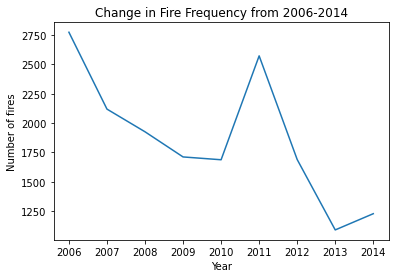

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.ylabel("Number of fires")
plt.xlabel("Year")
plt.title("Change in Fire Frequency from 2006-2014")
plt.plot(years, count)
plt.show()

While the above plot does not show a consistent linear trend, these results are consistent with the findings of the authors of the original papers

In [9]:
years =  fire_trends_df["START_YEAR"].unique()
years.sort()

In [10]:
years

array([2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.])

In [11]:
average_days_burning = {}
total_days_burning = {}
for year in years:
    list_of_days_burning = []
    temp_df = fire_trends_df.loc[fire_trends_df['START_YEAR']==year]
    for i in range(len(temp_df)):
        start_day = temp_df.iloc[i]['FOD_DISCOVERY_DOY']
        end_day = temp_df.iloc[i]["FOD_CONTAIN_DOY"]
        if not pd.isna(start_day) and not pd.isna(end_day):
            days_burn = end_day - start_day
            list_of_days_burning.append(days_burn)
    average_days_burning[year] = np.average(list_of_days_burning)
    total_days_burning[year] = np.sum(list_of_days_burning)
print(total_days_burning)

{2006.0: 18342.0, 2007.0: 13791.0, 2008.0: 11745.0, 2009.0: 15672.0, 2010.0: 16355.0, 2011.0: 16273.0, 2012.0: 15627.0, 2013.0: 14583.0, 2014.0: 12132.0}


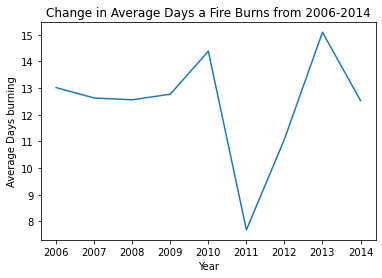

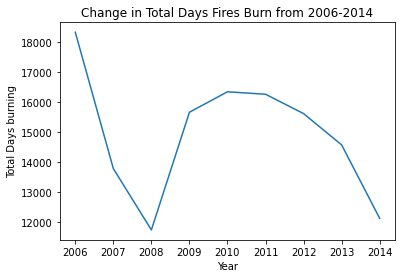

In [12]:
av_days_burn = [average_days_burning[key] for key in average_days_burning]

plt.figure()
plt.ylabel("Average Days burning")
plt.xlabel("Year")
plt.title("Change in Average Days a Fire Burns from 2006-2014")
plt.plot(years, av_days_burn)
plt.show()
plt.close()

total_days_burn = [total_days_burning[key] for key in total_days_burning]
plt.figure()
plt.ylabel("Total Days burning")
plt.xlabel("Year")
plt.title("Change in Total Days Fires Burn from 2006-2014")
plt.plot(years, total_days_burn)
plt.show()
plt.close()


In [13]:
total_acres = {}
average_acres = {}
for year in years:
    list_of_acres = []
    temp_df = fire_trends_df.loc[fire_trends_df['START_YEAR']==year]
    for i in range(len(temp_df)):
        acres = temp_df.iloc[i]['FINAL_ACRES']
        if not pd.isna(acres):
            list_of_acres.append(acres)
    average_acres[year] = np.average(list_of_acres)
    total_acres[year] = np.sum(list_of_acres)

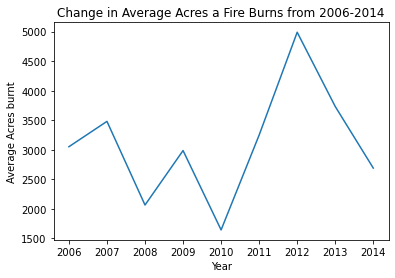

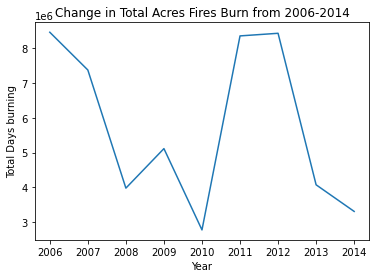

In [14]:
av_acres = [average_acres[key] for key in average_acres]

plt.figure()
plt.ylabel("Average Acres burnt")
plt.xlabel("Year")
plt.title("Change in Average Acres a Fire Burns from 2006-2014")
plt.plot(years, av_acres)
plt.show()
plt.close()

total_acre = [total_acres[key] for key in total_acres]
plt.figure()
plt.ylabel("Total Days burning")
plt.xlabel("Year")
plt.title("Change in Total Acres Fires Burn from 2006-2014")
plt.plot(years, total_acre)
plt.show()
plt.close()


## OPERATIONAL TRENDS ANALYSIS

operational trends are examined as aerial assets (total and max in one day), personnel (total and max in one day), and projected cost.
potentially add number of sit reports (INC_MGMT_NUM_SITREPS)??

In [15]:
operational_trends_cols = ["TOTAL_AERIAL_SUM", "TOTAL_PERSONNEL_SUM", "WF_PEAK_AERIAL", "WF_PEAK_PERSONNEL", "START_YEAR","PROJECTED_FINAL_IM_COST"]
operational_trends_df = incident_summary_df[operational_trends_cols]
operational_trends_df 

,TOTAL_AERIAL_SUM,TOTAL_PERSONNEL_SUM,WF_PEAK_AERIAL,WF_PEAK_PERSONNEL,START_YEAR,PROJECTED_FINAL_IM_COST
0,29.0,2798.000000,5.0,569.000000,2010.0,2024373.0
1,NaN,42.000000,NaN,42.000000,2006.0,20000.0
2,NaN,43.000000,NaN,43.000000,2006.0,2500.0
3,1.0,2578.000000,1.0,345.000000,2006.0,1333486.0
4,NaN,NaN,NaN,NaN,2006.0,2500.0
...,...,...,...,...,...,...
16795,NaN,55.500000,NaN,18.500000,2014.0,5200.0
16796,NaN,12.000000,NaN,12.000000,2014.0,500.0
16797,2.0,138.666667,1.0,69.333333,2014.0,2800.0
16798,NaN,56.000000,NaN,14.000000,2014.0,1600.0


In [16]:
operational_trends_df = operational_trends_df.loc[operational_trends_df["TOTAL_PERSONNEL_SUM"].notna()]
#remove rows with no personnel bc all fires would have some personnel, indicates incomplete reporting
operational_trends_df

,TOTAL_AERIAL_SUM,TOTAL_PERSONNEL_SUM,WF_PEAK_AERIAL,WF_PEAK_PERSONNEL,START_YEAR,PROJECTED_FINAL_IM_COST
0,29.0,2798.000000,5.0,569.000000,2010.0,2024373.0
1,NaN,42.000000,NaN,42.000000,2006.0,20000.0
2,NaN,43.000000,NaN,43.000000,2006.0,2500.0
3,1.0,2578.000000,1.0,345.000000,2006.0,1333486.0
5,7.0,1248.000000,2.0,247.000000,2006.0,300000.0
...,...,...,...,...,...,...
16795,NaN,55.500000,NaN,18.500000,2014.0,5200.0
16796,NaN,12.000000,NaN,12.000000,2014.0,500.0
16797,2.0,138.666667,1.0,69.333333,2014.0,2800.0
16798,NaN,56.000000,NaN,14.000000,2014.0,1600.0


In [17]:
total_aerial = {}
average_aerial = {}
total_person = {}
average_person = {}
for year in years:
    list_of_person = []
    list_of_aerial = []
    temp_df = operational_trends_df.loc[operational_trends_df['START_YEAR']==year]
    for i in range(len(temp_df)):
        aerial = temp_df.iloc[i]["WF_PEAK_AERIAL"]
        person = temp_df.iloc[i]['WF_PEAK_PERSONNEL']
        list_of_person.append(person)
        if pd.isna(aerial):
            aerial = 0
        list_of_aerial.append(aerial)
    average_aerial[year] = np.average(list_of_aerial)
    total_aerial[year] = np.sum(list_of_aerial)
    average_person[year] = np.average(list_of_person)
    total_person[year] = np.sum(list_of_person)

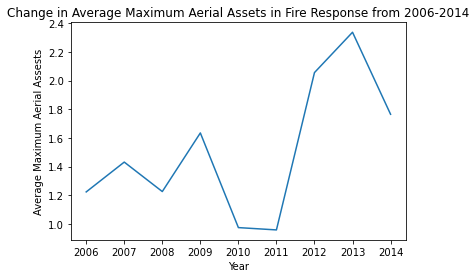

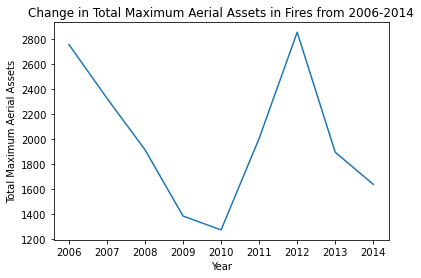

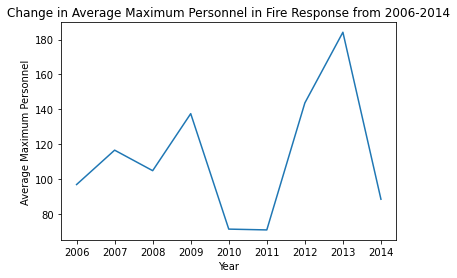

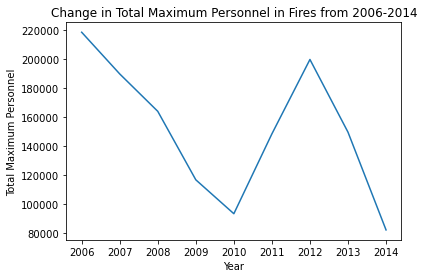

In [18]:
av_aerial = [average_aerial[key] for key in average_aerial]

plt.figure()
plt.ylabel("Average Maximum Aerial Assests")
plt.xlabel("Year")
plt.title("Change in Average Maximum Aerial Assets in Fire Response from 2006-2014")
plt.plot(years, av_aerial)
plt.show()
plt.close()

total_aerial = [total_aerial[key] for key in total_aerial]
plt.figure()
plt.ylabel("Total Maximum Aerial Assets")
plt.xlabel("Year")
plt.title("Change in Total Maximum Aerial Assets in Fires from 2006-2014")
plt.plot(years, total_aerial)
plt.show()
plt.close()

av_person = [average_person[key] for key in average_person]

plt.figure()
plt.ylabel("Average Maximum Personnel")
plt.xlabel("Year")
plt.title("Change in Average Maximum Personnel in Fire Response from 2006-2014")
plt.plot(years, av_person)
plt.show()
plt.close()

total_person = [total_person[key] for key in total_person]
plt.figure()
plt.ylabel("Total Maximum Personnel")
plt.xlabel("Year")
plt.title("Change in Total Maximum Personnel in Fires from 2006-2014")
plt.plot(years, total_person)
plt.show()
plt.close()


In [19]:
total_cost = {}
average_cost = {}
for year in years:
    list_of_cost = []
    temp_df = operational_trends_df.loc[operational_trends_df['START_YEAR']==year]
    for i in range(len(temp_df)):
        cost = temp_df.iloc[i]["PROJECTED_FINAL_IM_COST"]
        if not pd.isna(cost):
            list_of_cost.append(cost)
    average_cost[year] = np.average(list_of_cost)
    total_cost[year] = np.sum(list_of_cost)

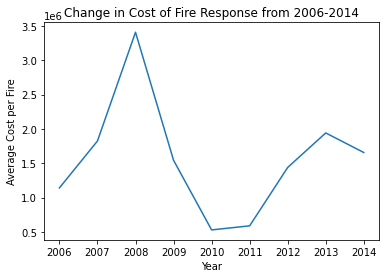

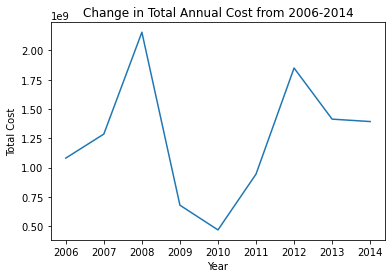

In [20]:
av_cost = [average_cost[key] for key in average_cost]

plt.figure()
plt.ylabel("Average Cost per Fire")
plt.xlabel("Year")
plt.title("Change in Cost of Fire Response from 2006-2014")
plt.plot(years, av_cost)
plt.show()
plt.close()

total_cost = [total_cost[key] for key in total_cost]
plt.figure()
plt.ylabel("Total Cost")
plt.xlabel("Year")
plt.title("Change in Total Annual Cost from 2006-2014")
plt.plot(years, total_cost)
plt.show()
plt.close()


## INTENSITY TREND ANALYSIS
intensity is looked at as the number of injuries, number of fatalities, number of structures damaged, number of structures destroyed

In [21]:
intensity_cols = ["STR_DESTROYED_TOTAL","STR_DAMAGED_TOTAL","INJURIES_TOTAL","FATALITIES", "START_YEAR"]
intensity_df = incident_summary_df[intensity_cols]
intensity_df

,STR_DESTROYED_TOTAL,STR_DAMAGED_TOTAL,INJURIES_TOTAL,FATALITIES,START_YEAR
0,0.0,0.0,1.0,0.0,2010.0
1,0.0,0.0,1.0,0.0,2006.0
2,0.0,0.0,0.0,0.0,2006.0
3,0.0,0.0,0.0,0.0,2006.0
4,0.0,0.0,0.0,0.0,2006.0
...,...,...,...,...,...
16795,0.0,0.0,0.0,0.0,2014.0
16796,0.0,0.0,0.0,0.0,2014.0
16797,0.0,0.0,0.0,0.0,2014.0
16798,0.0,0.0,0.0,0.0,2014.0


In [22]:
total_str_des = {}
average_str_des = {}
total_str_damage = {}
average_str_damage = {}
total_injuries = {}
average_injuries = {}
total_fatalities = {}
average_fatalities = {}

for year in years:
    list_of_dest = []
    list_of_dam = []
    list_of_injury = []
    list_of_fatalities = []
    temp_df =intensity_df.loc[intensity_df['START_YEAR']==year]
    for i in range(len(temp_df)):
        dest = temp_df.iloc[i]["STR_DESTROYED_TOTAL"]
        damage = temp_df.iloc[i]["STR_DAMAGED_TOTAL"]
        injury = temp_df.iloc[i]["INJURIES_TOTAL"]
        fatality = temp_df.iloc[i]["FATALITIES"]
        list_of_dest.append(dest)
        list_of_dam.append(damage)
        list_of_injury.append(injury)
        list_of_fatalities.append(fatality)
    total_str_des[year] = np.sum(list_of_dest)
    average_str_des[year] = np.average(list_of_dest)
    total_str_damage[year] = np.sum(list_of_dam)
    average_str_damage[year] = np.average(list_of_dam)
    total_injuries[year] = np.sum(list_of_injury)
    average_injuries[year] = np.average(list_of_injury)
    total_fatalities[year] = np.sum(list_of_fatalities)
    average_fatalities[year] = np.average(list_of_fatalities)

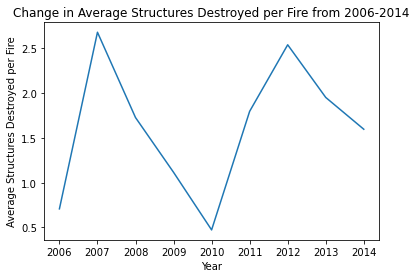

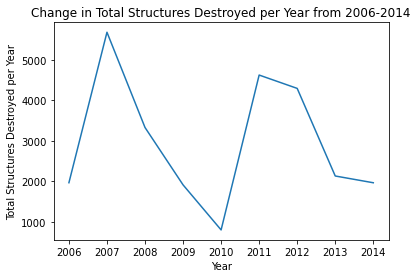

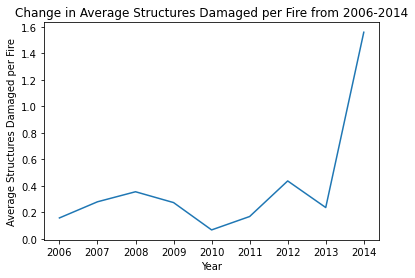

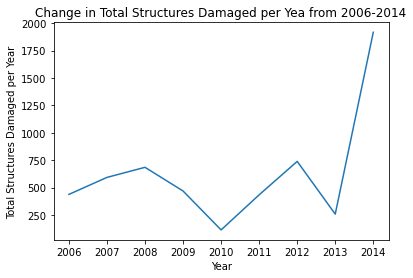

In [23]:
av_des = [average_str_des[key] for key in average_str_des]

plt.figure()
plt.ylabel("Average Structures Destroyed per Fire")
plt.xlabel("Year")
plt.title("Change in Average Structures Destroyed per Fire from 2006-2014")
plt.plot(years, av_des)
plt.show()
plt.close()

total_des = [total_str_des[key] for key in total_str_des]
plt.figure()
plt.ylabel("Total Structures Destroyed per Year")
plt.xlabel("Year")
plt.title("Change in Total Structures Destroyed per Year from 2006-2014")
plt.plot(years, total_des)
plt.show()
plt.close()

av_damage = [average_str_damage[key] for key in average_str_damage]

plt.figure()
plt.ylabel("Average Structures Damaged per Fire")
plt.xlabel("Year")
plt.title("Change in Average Structures Damaged per Fire from 2006-2014")
plt.plot(years, av_damage)
plt.show()
plt.close()

total_damage = [total_str_damage[key] for key in total_str_damage]
plt.figure()
plt.ylabel("Total Structures Damaged per Year")
plt.xlabel("Year")
plt.title("Change in Total Structures Damaged per Yea from 2006-2014")
plt.plot(years, total_damage)
plt.show()
plt.close()


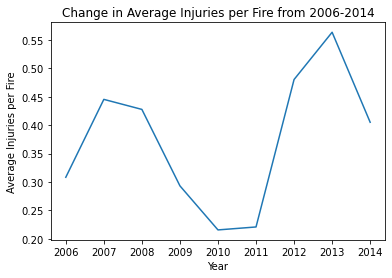

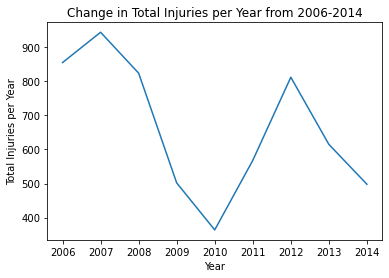

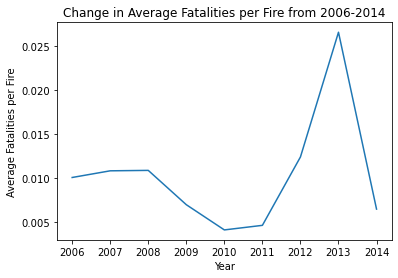

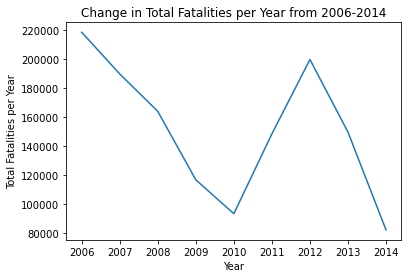

In [24]:
av_injury = [average_injuries[key] for key in average_injuries]

plt.figure()
plt.ylabel("Average Injuries per Fire")
plt.xlabel("Year")
plt.title("Change in Average Injuries per Fire from 2006-2014")
plt.plot(years, av_injury)
plt.show()
plt.close()

total_injury = [total_injuries[key] for key in total_injuries]
plt.figure()
plt.ylabel("Total Injuries per Year")
plt.xlabel("Year")
plt.title("Change in Total Injuries per Year from 2006-2014")
plt.plot(years, total_injury)
plt.show()
plt.close()

av_fatality = [average_fatalities[key] for key in average_fatalities]

plt.figure()
plt.ylabel("Average Fatalities per Fire")
plt.xlabel("Year")
plt.title("Change in Average Fatalities per Fire from 2006-2014")
plt.plot(years, av_fatality)
plt.show()
plt.close()

total_fatality = [total_fatalities[key] for key in total_fatalities]
plt.figure()
plt.ylabel("Total Fatalities per Year")
plt.xlabel("Year")
plt.title("Change in Total Fatalities per Year from 2006-2014")
plt.plot(years, total_person)
plt.show()
plt.close()


## Correlation Matrix

In [25]:
ops_fire_df_avs = pd.DataFrame({
    "fire frequency": count,
    "average days fire burns": av_days_burn,
    "average acres fire burns": av_acres,
    "average aerial assets per fire": av_aerial,
    "average personnel per fire": av_person,
    "average cost per fire": av_cost,
    "average structures damaged per fire": av_damage,
    "average structures destroyed per fire": av_des,
    "average injuries per fire": av_injury,
    "average fatalities per fire": av_fatality
})

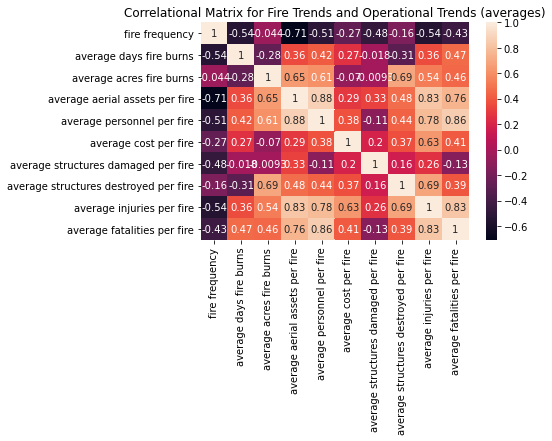

In [26]:
corrMatrix = ops_fire_df_avs.corr()
sn.heatmap(corrMatrix, annot=True)
plt.title("Correlational Matrix for Fire Trends and Operational Trends (averages)")
plt.show()

As seen above, fire frequency is negatively correlated with assets, indicating higher frequencies may be smaller fires, where lower frequencies are related to larger fires, thus more assets. 

The average days the fire burns is weakly correlated with max assets, would likely be closer correlated with total assets accross an operation. Negatively correlated with fire frequency, indication longer fires occur less frequently.

average acres burned is moderately positively correlated with assets, but for some reason is negatively correlated with days burning (could be due to outliers)

average maximum aerial assets is strongest correlated with personnel, which makes sense. Also positively correlated with acres burned, days burning, and cost, indicating more aerial support is needed in more intense fires.

average maximum personnel is positively correlated with acres burned and days burning

cost is most strongly associated with days burning, assets, and personnel, but it is still moderate. Cost can likely be explained better by number of structures damages

In [27]:
ops_fire_df_totals = pd.DataFrame({
    "fire frequency": count,
    "total days fires burned": total_days_burn,
    "total acres fires burned": total_acre,
    "total aerial assets": total_aerial,
    "total personnel": total_person,
    "total cost": total_cost,
    "total structures damaged": total_damage,
    "total structures destroyed": total_des,
    "total injuries": total_injury,
    "total fatalities": total_fatality
})

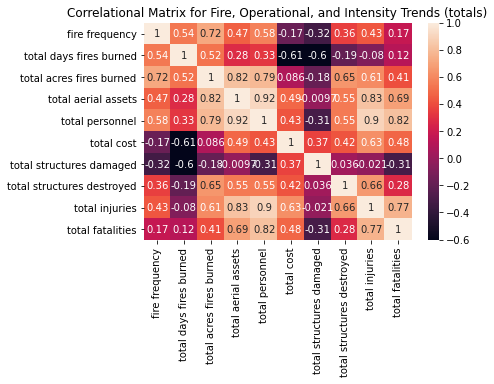

In [28]:
corrMatrix = ops_fire_df_totals.corr()
sn.heatmap(corrMatrix, annot=True)
plt.title("Correlational Matrix for Fire, Operational, and Intensity Trends (totals)")
plt.show()

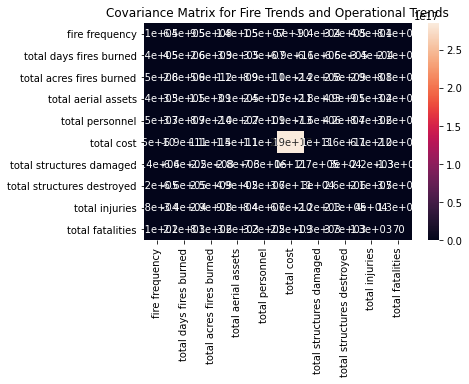

In [29]:
covMatrix = pd.DataFrame.cov(ops_fire_df_totals)
sn.heatmap(covMatrix, annot=True)
plt.title("Covariance Matrix for Fire Trends and Operational Trends")
plt.show()

## HAZARD METRIC ANALYSIS

In [30]:
preprocessed_file = r"C:\Users\srandrad\smart_nlp\output data\ICS_full_combinedtopics-Mar-10-2021\preprocessed_data.csv"
hazard_df = pd.read_csv(preprocessed_file)

time_of_occurence_days = {"resources":{str(year):[] for year in years}, "traffic":{str(year):[] for year in years}, "grounded":{str(year):[] for year in years}}
time_of_occurence_pct_contained = {"resources":{str(year):[] for year in years}, "traffic":{str(year):[] for year in years}, "grounded":{str(year):[] for year in years}}
frequency = {"resources":{str(year):0 for year in years}, "traffic":{str(year):0 for year in years}, "grounded":{str(year):0 for year in years}}
fires = {"resources":{str(year):[] for year in years}, "traffic":{str(year):[] for year in years}, "grounded":{str(year):[] for year in years}}

In [31]:
hazard_df = hazard_df.loc[hazard_df["START_YEAR"]>2005]
years = hazard_df["START_YEAR"].unique()
years.sort()
hazard_df

,CY,DISCOVERY_DATE,INCIDENT_ID,PCT_CONTAINED_COMPLETED,START_YEAR,TOTAL_AERIAL,TOTAL_PERSONNEL,REPORT_DOY,DISCOVERY_DOY,Combined Text
2348,2010,2010-07-15 15:00:00,2000_CA-RRU-062485_VALLEY COMPLEX,80.0,2010.0,5.000000,230.000000,197,196,"['resource', 'cactus', 'share']"
2349,2010,2010-07-15 15:00:00,2000_CA-RRU-062485_VALLEY COMPLEX,60.0,2010.0,5.000000,230.000000,197,196,"['resource', 'lightning strike', 'predict', 'c..."
2350,2010,2010-07-15 15:00:00,2000_CA-RRU-062485_VALLEY COMPLEX,30.0,2010.0,4.000000,165.000000,197,196,"['resource', 'lightning strike', 'predict', 'c..."
2351,2010,2010-07-15 15:00:00,2000_CA-RRU-062485_VALLEY COMPLEX,30.0,2010.0,4.333333,192.333333,197,196,"['valley', 'resource', 'lightning strike', 'be..."
2352,2010,2010-07-15 15:00:00,2000_CA-RRU-062485_VALLEY COMPLEX,100.0,2010.0,4.333333,192.333333,197,196,"['valley', 'resource', 'become', 'cactus', 'ma..."
...,...,...,...,...,...,...,...,...,...,...
80828,2014,2014-03-21 13:00:00,2014_VAVAS1406043_PINE CREEK,100.0,2014.0,0.000000,14.000000,82,80,['fuel']
80829,2014,2014-03-21 13:00:00,2014_VAVAS1406043_PINE CREEK,100.0,2014.0,0.000000,14.000000,82,80,['fuel']
80830,2014,2014-08-20 13:00:00,2014_WA-WFS-513_SAND RIDGE,0.0,2014.0,1.000000,95.000000,234,232,"['edge', 'lack', 'disc', 'heavy', 'come', 'agr..."
80831,2014,2014-08-20 13:00:00,2014_WA-WFS-513_SAND RIDGE,86.0,2014.0,1.000000,120.000000,235,232,"['perimeter', 'create', 'swing', 'accord', 'st..."


In [32]:
for year in years:
    temp_df = hazard_df.loc[hazard_df["START_YEAR"]==year]
    fire_ids = temp_df["INCIDENT_ID"].unique()
    for id_ in fire_ids:
        temp_fire_df = temp_df.loc[temp_df["INCIDENT_ID"]==id_]
        start_date = temp_fire_df["DISCOVERY_DOY"].unique() #should only have one start date
        if len(start_date) != 1: 
            #print("multiple start dates", start_date)
            start_date = min(start_date)
        else: 
            start_date = start_date[0]
        if start_date == 365:
                start_date = 0
            #print(start_date)
        for i in range(len(temp_fire_df)):
            text = temp_fire_df.iloc[i]["Combined Text"]
            #check for resource hazard
            if (("resource" in text) or ("crew" in text)) and (("limited" in text) or ("share" in text) or ("lack" in text) or ("fatigue" in text)):
                time_of_hazard = int(temp_fire_df.iloc[i]["REPORT_DOY"])
                if time_of_hazard<start_date: 
                    #print(time_of_hazard, start_date)
                    if time_of_hazard<30: #report day is days since start, not doy 
                        time_of_hazard+=start_date
                    else: #start and report day were incorrectly switched
                        #print(time_of_hazard, start_date)
                        temp_start = start_date
                        start_date = time_of_hazard
                        time_of_hazard = temp_start
                        #print(time_of_hazard, start_date)
                time_of_occurence_days["resources"][str(year)].append(time_of_hazard-int(start_date))
                time_of_occurence_pct_contained["resources"][str(year)].append(temp_fire_df.iloc[i]["PCT_CONTAINED_COMPLETED"])
                fires["resources"][str(year)].append(id_)
                frequency["resources"][str(year)] += 1
                
            #check for traffic hazard
            if (("highway" in text) or ("road" in text)) and (("close" in text) or ("closure" in text)):
                time_of_hazard = int(temp_fire_df.iloc[i]["REPORT_DOY"])
                time_of_occurence_days["traffic"][str(year)].append(time_of_hazard-int(start_date))
                time_of_occurence_pct_contained["traffic"][str(year)].append(temp_fire_df.iloc[i]["PCT_CONTAINED_COMPLETED"])
                fires["traffic"][str(year)].append(id_)
                frequency["traffic"][str(year)] += 1
                
            #check for grounded hazard
            if (("ground" in text)) and (("aircraft" in text) or ("helicopter" in text) or ("heli" in text) or ("copter" in text) or ("aerial" in text) or ("tanker" in text)):
                time_of_hazard = int(temp_fire_df.iloc[i]["REPORT_DOY"])
                time_of_occurence_days["grounded"][str(year)].append(time_of_hazard-int(start_date))
                time_of_occurence_pct_contained["grounded"][str(year)].append(temp_fire_df.iloc[i]["PCT_CONTAINED_COMPLETED"])
                fires["grounded"][str(year)].append(id_)
                frequency["grounded"][str(year)] += 1

In [33]:
def remove_outliers(data, threshold=1.5):
    #print(data)
    Q1 = np.quantile(data,0.25)
    Q3 = np.quantile(data,0.75)
    IQR = Q3 - Q1
    new_data = [pt for pt in data if (pt>(Q1-1.5*IQR)) and (pt<(Q3+1.5*IQR))]
    return new_data

In [34]:
#removing outliers from data using inter-quartile-range
time_of_occurence_days
time_of_occurence_pct_contained 
for year in years:
    time_of_occurence_days["resources"][str(year)] = remove_outliers(time_of_occurence_days["resources"][str(year)])
    time_of_occurence_pct_contained["resources"][str(year)] = remove_outliers(time_of_occurence_pct_contained["resources"][str(year)])
    time_of_occurence_days["traffic"][str(year)] = remove_outliers(time_of_occurence_days["traffic"][str(year)])
    time_of_occurence_pct_contained["traffic"][str(year)] = remove_outliers(time_of_occurence_pct_contained["traffic"][str(year)])
    time_of_occurence_days["grounded"][str(year)] = remove_outliers(time_of_occurence_days["grounded"][str(year)])
    time_of_occurence_pct_contained["grounded"][str(year)] = remove_outliers(time_of_occurence_pct_contained["grounded"][str(year)])

In [35]:
time_of_occurence_days["grounded"]

{'2006.0': [11,
  12,
  12,
  13,
  13,
  14,
  14,
  15,
  15,
  16,
  21,
  40,
  44,
  46,
  46,
  47,
  47,
  48,
  48,
  49,
  49,
  50,
  50,
  51,
  51,
  52,
  52,
  53,
  53,
  54,
  54,
  55,
  55,
  9,
  45,
  1,
  1,
  2,
  3,
  4,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  1,
  41,
  2,
  7,
  19,
  21,
  22,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  4,
  6,
  0,
  6,
  7,
  8,
  9,
  27,
  4,
  5,
  6,
  9,
  13,
  4,
  54,
  5],
 '2007.0': [3,
  3,
  4,
  4,
  4,
  4,
  5,
  5,
  6,
  6,
  7,
  7,
  18,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  2,
  6,
  9,
  9,
  15,
  16,
  17,
  18,
  19,
  20,
  24,
  25,
  26,
  4,
  4,
  18,
  19,
  20,
  21,
  22,
  23,
  20,
  4,
  5,
  6,
  0,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17],
 '2008.0': [2,
  2,
  5,
  5,
  6,
  7,
  7,
  8,
  8,
  9,
  12,
  13,
  13,
  14,
  14,
  15,
  15,
  17,
  18,
  18,
  19,
  19,
  25,
  3,
  3,
  7,
  8,
  8,
  9,
  9,
  10,
  9,

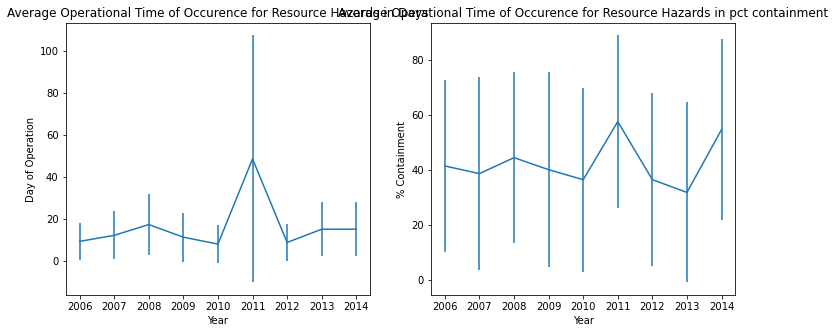

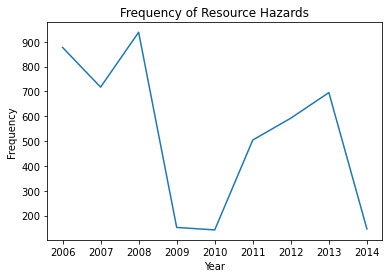

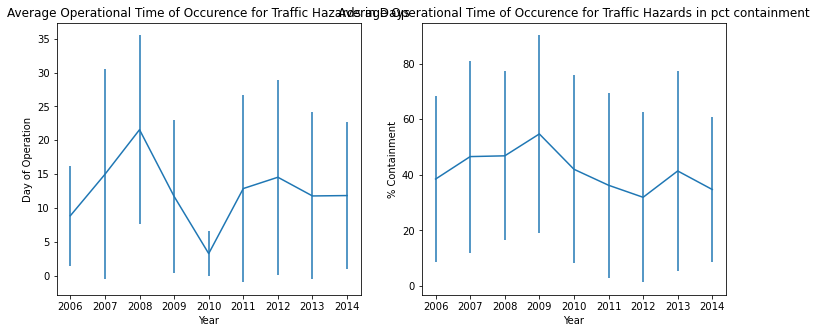

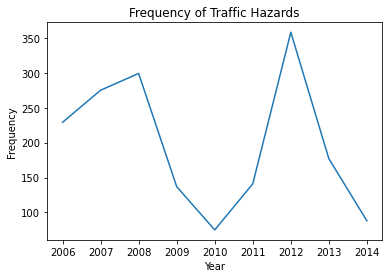

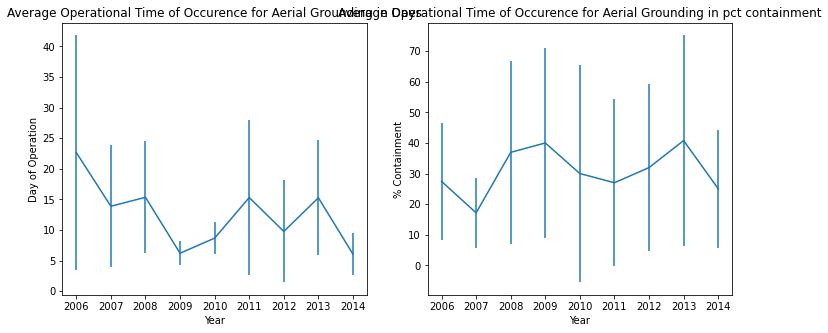

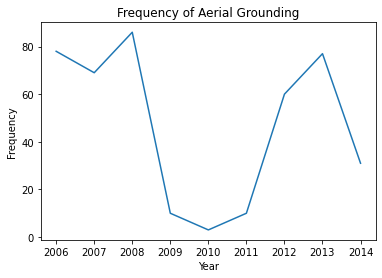

In [36]:
#display TS results for each hazard and metric

#resources:
av_resource_time = [np.average(time_of_occurence_days["resources"][year]) for year in time_of_occurence_days["resources"]]
std_devs_resource_time = [np.std(time_of_occurence_days["resources"][year]) for year in time_of_occurence_days["resources"]]

#print(av_resource_time, len(av_resource_time), len(years))
av_resource_pct = [np.average(time_of_occurence_pct_contained ["resources"][year]) for year in time_of_occurence_pct_contained ["resources"]]
std_devs_resource_pct = [np.std(time_of_occurence_pct_contained ["resources"][year]) for year in time_of_occurence_pct_contained ["resources"]]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Average Operational Time of Occurence for Resource Hazards in Days")
plt.xlabel("Year")
plt.ylabel("Day of Operation")
plt.errorbar(years, av_resource_time, yerr=std_devs_resource_time)
plt.subplot(1, 2, 2)
plt.title("Average Operational Time of Occurence for Resource Hazards in pct containment")
plt.xlabel("Year")
plt.ylabel("% Containment")
plt.errorbar(years, av_resource_pct, yerr=std_devs_resource_pct)

resource_freq = [frequency["resources"][year] for year in frequency["resources"]]
plt.figure()
plt.title("Frequency of Resource Hazards")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.plot(years,resource_freq)

#traffic:
av_traffic_time = [np.average(time_of_occurence_days["traffic"][year]) for year in time_of_occurence_days["traffic"]]
std_devs_traffic_time = [np.std(time_of_occurence_days["traffic"][year]) for year in time_of_occurence_days["traffic"]]

av_traffic_pct = [np.average(time_of_occurence_pct_contained ["traffic"][year]) for year in time_of_occurence_pct_contained ["traffic"]]
std_devs_traffic_pct = [np.std(time_of_occurence_pct_contained ["traffic"][year]) for year in time_of_occurence_pct_contained ["traffic"]]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Average Operational Time of Occurence for Traffic Hazards in Days")
plt.xlabel("Year")
plt.ylabel("Day of Operation")
plt.errorbar(years, av_traffic_time, yerr=std_devs_traffic_time)
plt.subplot(1, 2, 2)
plt.title("Average Operational Time of Occurence for Traffic Hazards in pct containment")
plt.xlabel("Year")
plt.ylabel("% Containment")
plt.errorbar(years, av_traffic_pct, yerr=std_devs_traffic_pct)

traffic_freq = [frequency["traffic"][year] for year in frequency["traffic"]]
plt.figure()
plt.title("Frequency of Traffic Hazards")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.plot(years,traffic_freq)

#grounded:
av_grounded_time = [np.average(time_of_occurence_days["grounded"][year]) for year in time_of_occurence_days["grounded"]]
std_devs_grounded_time = [np.std(time_of_occurence_days["grounded"][year]) for year in time_of_occurence_days["grounded"]]

av_grounded_pct = [np.average(time_of_occurence_pct_contained ["grounded"][year]) for year in time_of_occurence_pct_contained ["grounded"]]
std_devs_grounded_pct = [np.std(time_of_occurence_pct_contained ["grounded"][year]) for year in time_of_occurence_pct_contained ["grounded"]]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Average Operational Time of Occurence for Aerial Grounding in Days")
plt.xlabel("Year")
plt.ylabel("Day of Operation")
plt.errorbar(years, av_grounded_time, yerr=std_devs_grounded_time)
plt.subplot(1, 2, 2)
plt.title("Average Operational Time of Occurence for Aerial Grounding in pct containment")
plt.xlabel("Year")
plt.ylabel("% Containment")
plt.errorbar(years, av_grounded_pct, yerr=std_devs_grounded_pct)

grounded_freq = [frequency["grounded"][year] for year in frequency["grounded"]]
plt.figure()
plt.title("Frequency of Aerial Grounding")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.plot(years, grounded_freq)


In [37]:
#display averages across years in a table
data = {"hazard":["resource availability", "public traffic closures", "aerial groundings"],
        "operational time to occurence (days)": [],
        "operational time to occurence (% containment)": [],
       }
ground_time = np.average([time for year in years for time in time_of_occurence_days["grounded"][str(year)]])
traffic_time = np.average([time for year in years for time in time_of_occurence_days["traffic"][str(year)]])
resource_time = np.average([time for year in years for time in time_of_occurence_days["resources"][str(year)]]) 
data["operational time to occurence (days)"] = [resource_time, traffic_time, ground_time]

#ground_time_std = np.std([time for year in years for time in time_of_occurence_days["grounded"][str(year)]])
#traffic_time_std = np.std([time for year in years for time in time_of_occurence_days["traffic"][str(year)]])
#resource_time_std = np.std([time for year in years for time in time_of_occurence_days["resources"][str(year)]])

ground_time_data = [time for year in years for time in time_of_occurence_days["grounded"][str(year)]]
traffic_time_data = [time for year in years for time in time_of_occurence_days["traffic"][str(year)]]
resource_time_data = [time for year in years for time in time_of_occurence_days["resources"][str(year)]]
ground_time_interval = st.t.interval(alpha=0.95, df=len(ground_time_data)-1, loc=np.mean(ground_time_data), scale=st.sem(ground_time_data))
traffic_time_interval = st.t.interval(alpha=0.95, df=len(traffic_time_data)-1, loc=np.mean(traffic_time_data), scale=st.sem(traffic_time_data))
resource_time_interval = st.t.interval(alpha=0.95, df=len(resource_time_data)-1, loc=np.mean(resource_time_data), scale=st.sem(resource_time_data))
data["operational time to occurence interval (days)"] = [resource_time_interval, traffic_time_interval, ground_time_interval]

ground_pct = np.average([pct for year in years for pct in time_of_occurence_pct_contained["grounded"][str(year)]])
traffic_pct = np.average([pct for year in years for pct in time_of_occurence_pct_contained["traffic"][str(year)]])
resource_pct = np.average([pct for year in years for pct in time_of_occurence_pct_contained["resources"][str(year)]])
data["operational time to occurence (% containment)"] = [resource_pct, traffic_pct, ground_pct]

ground_pct_data = [time for year in years for time in time_of_occurence_pct_contained["grounded"][str(year)]]
traffic_pct_data = [time for year in years for time in time_of_occurence_pct_contained["traffic"][str(year)]]
resource_pct_data = [time for year in years for time in time_of_occurence_pct_contained["resources"][str(year)]]
ground_pct_interval = st.t.interval(alpha=0.95, df=len(ground_pct_data)-1, loc=np.mean(ground_pct_data), scale=st.sem(ground_pct_data))
traffic_pct_interval = st.t.interval(alpha=0.95, df=len(traffic_pct_data)-1, loc=np.mean(traffic_pct_data), scale=st.sem(traffic_pct_data))
resource_pct_interval = st.t.interval(alpha=0.95, df=len(resource_pct_data)-1, loc=np.mean(resource_pct_data), scale=st.sem(resource_pct_data))
data["operational time to occurence interval (% containment)"] = [resource_pct_interval, traffic_pct_interval, ground_pct_interval]

#ground_pct_std = np.std([pct for year in years for pct in time_of_occurence_pct_contained["grounded"][str(year)]])
#traffic_pct_std = np.std([pct for year in years for pct in time_of_occurence_pct_contained["traffic"][str(year)]])
#resource_pct_std = np.std([pct for year in years for pct in time_of_occurence_pct_contained["resources"][str(year)]])

ground_sum = np.sum([frequency["grounded"][year] for year in frequency["grounded"]])
traffic_sum = np.sum([frequency["traffic"][year] for year in frequency["traffic"]])
resources_sum = np.sum([frequency["resources"][year] for year in frequency["resources"]])

ground_rate_years = ground_sum/len(years)
traffic_rate_years = traffic_sum/len(years)
resources_rate_years = resources_sum/len(years)
data["average rate of occurence (per year)"] = [resources_rate_years, traffic_rate_years, ground_rate_years]

total_fires = len(hazard_df["INCIDENT_ID"].unique())
ground_rate_fires = total_fires/ground_sum
traffic_rate_fires = total_fires/traffic_sum
resources_rate_fires = total_fires/resources_sum
data["average rate of occurence (fires per occurence)"] = [resources_rate_fires, traffic_rate_fires, ground_rate_fires]

for d in data:
    print(len(data[d]),d,type(data[d]))
data_df = pd.DataFrame(data)
data_df

3 hazard <class 'list'>
3 operational time to occurence (days) <class 'list'>
3 operational time to occurence (% containment) <class 'list'>
3 operational time to occurence interval (days) <class 'list'>
3 operational time to occurence interval (% containment) <class 'list'>
3 average rate of occurence (per year) <class 'list'>
3 average rate of occurence (fires per occurence) <class 'list'>


,hazard,operational time to occurence (days),operational time to occurence (% containment),operational time to occurence interval (days),operational time to occurence interval (% containment),average rate of occurence (per year),average rate of occurence (fires per occurence)
0,resource availability,16.714191,41.540859,"(15.98913502722264, 17.43924752015506)","(40.59396594437394, 42.48775221051391)",529.222222,2.134579
1,public traffic closures,13.917153,41.068651,"(13.27013933946179, 14.564166378157813)","(39.53055168716781, 42.606749900133785)",197.666667,5.715008
2,aerial groundings,14.825243,31.414500,"(13.615344197548884, 16.035141239344316)","(28.716290730671926, 34.11270926932807)",47.111111,23.978774


In [38]:
ops_fire_hazard_total = pd.DataFrame({
    "fire frequency": count,
    "total days fires burned": total_days_burn,
    "total acres fires burned": total_acre,
    "total aerial assets": total_aerial,
    "total personnel": total_person,
    "total cost": total_cost,
    "total Resource Issues":resource_freq,
    "total Traffic Hazards": traffic_freq,
    "total Aerial Groundings": grounded_freq,
})


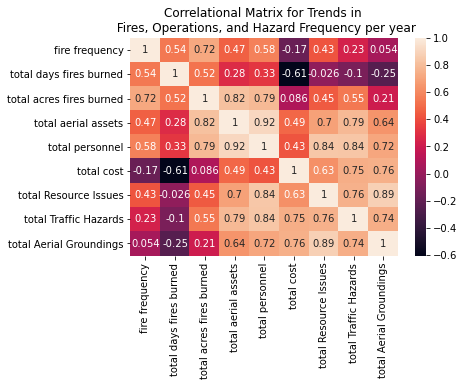

In [39]:
corrMatrix =ops_fire_hazard_total.corr()
sn.heatmap(corrMatrix, annot=True)
plt.title("Correlational Matrix for Trends in \n Fires, Operations, and Hazard Frequency per year")
plt.show()